**Summary of the dataset and Goal of the Project**

This datasets is related to variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. 

The Goal is to anticipate the quality of wine.

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
dfr = pd.read_csv("winequality-red.csv",sep=";")
dfr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
pd.set_option('display.max_columns',None)
dfw = pd.read_csv("winequality-white.csv",sep=";")
dfw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#information of the data
dfr.info()
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [4]:
# Total count of 'Outcome'
print(dfw['quality'].value_counts())
print(dfr['quality'].value_counts())

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [5]:
dfw['Type']='white'
dfr['Type']='red'

In [6]:
df=pd.concat([dfw,dfr])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [7]:
df.head(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


**Data Preprocessing**

We have investigated below
1. No null value
2. Only 1 categorical column

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

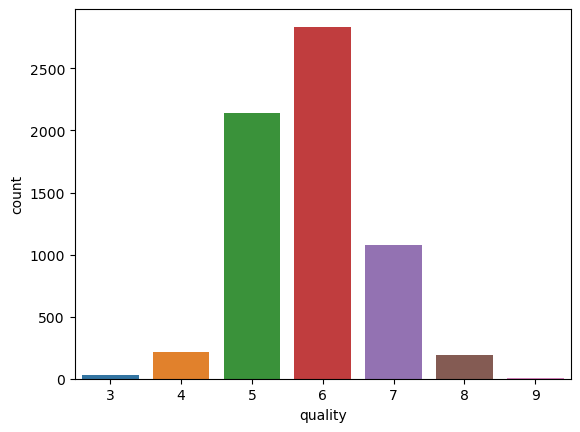

In [8]:
# Total count of 'quality'
print(df['quality'].value_counts())
sns.countplot(x="quality",data=df)

Findings: This dataset has imbalance class of wine quality. Later we will do SMOTE to handle the imbalance classes.

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Exploratory Data Analysis (EDA)**

C:\Users\sudip\AppData\Local\Temp\ipykernel_20976\2632221381.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(df.corr()))
C:\Users\sudip\AppData\Local\Temp\ipykernel_20976\2632221381.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',mask=mask,annot=True)


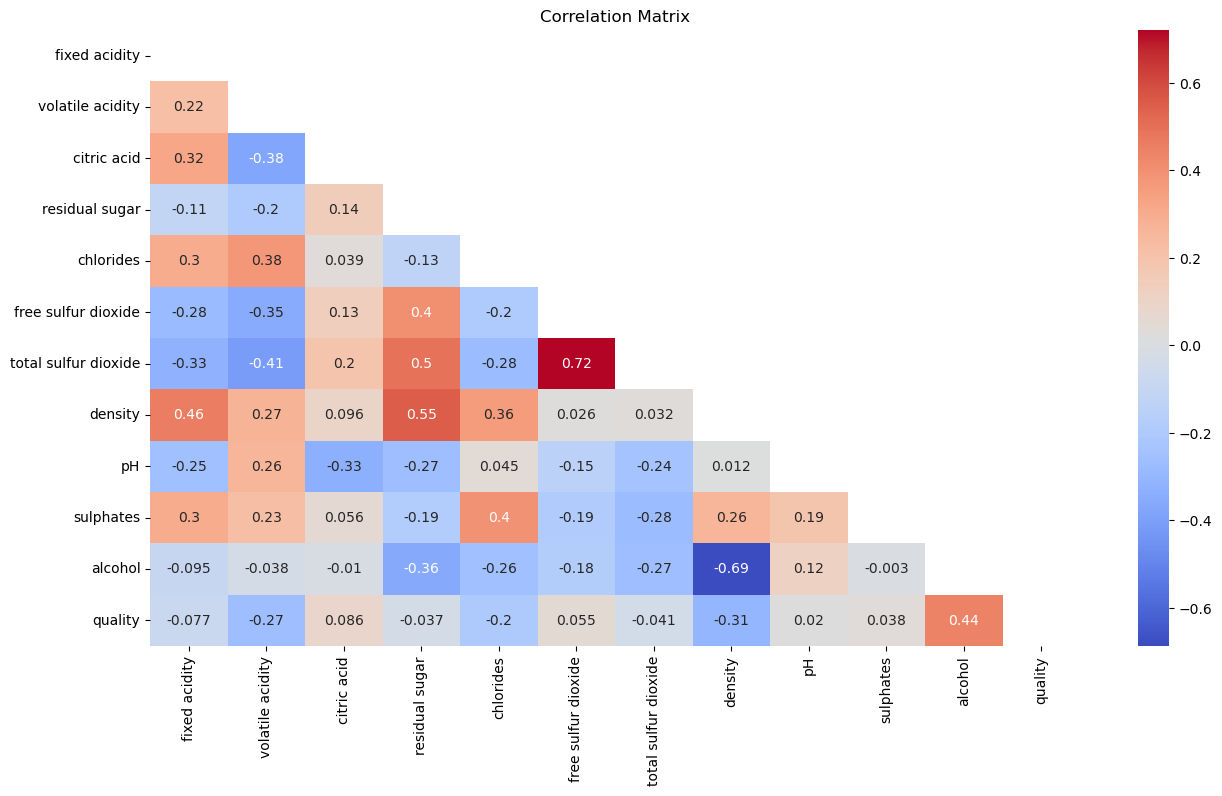

In [10]:
# The Heatmap will show us the relationship between two variables
import numpy as np
plt.figure(figsize=(15, 8))
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),cmap='coolwarm',mask=mask,annot=True)
plt.title('Correlation Matrix')
plt.show()

Findings: 
1. The heatmap indicates a negative correlation between wine quality and fixed acidity, volatile acidity, residual sugar, chlorides, total sulfur dioxide, and density. However, the Pearson correlation coefficient values suggest that the relationship is not very strong.
2. There are some positive correlation between wine quality and citric acid, free sulfur dioxide, pH, sulphates, alcohol. However r value suggest a strong relationship with alcohol only.
3. In the heat map also suggest a strong correlation between total sulfur dioxide and free sulfur dioxide. 

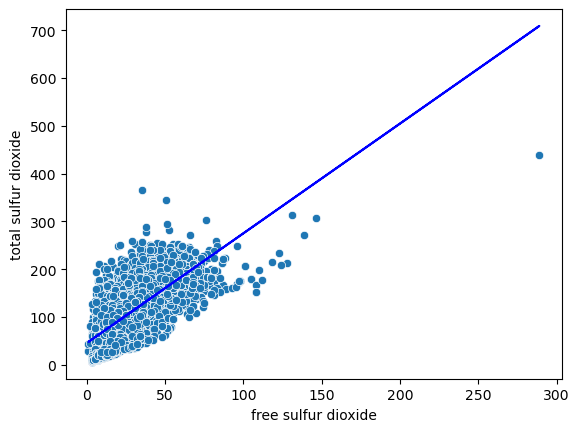

In [11]:
# Checking correlation between total sulfur dioxide and free sulfur dioxide
from scipy import stats
sns.scatterplot(data=df,x="free sulfur dioxide",y="total sulfur dioxide")
slope, intercept, r_value, p_value, std_err = stats.linregress(df["free sulfur dioxide"], df["total sulfur dioxide"])
plt.plot(df["free sulfur dioxide"], slope * df["free sulfur dioxide"] + intercept, color='blue')
plt.show()

quality
3    10.215000
4    10.180093
5     9.837783
6    10.587553
7    11.386006
8    11.678756
9    12.180000
Name: alcohol, dtype: float64

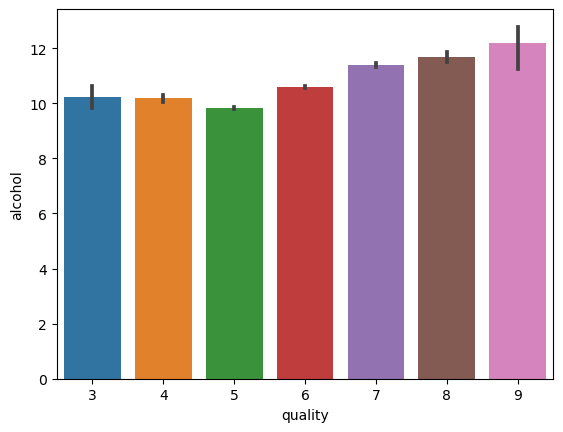

In [12]:
# Checking impact of quantity of alcohol in the quality of wines
sns.barplot(x="quality",y="alcohol",data=df)
df.groupby("quality")['alcohol'].mean()

Findings: 
We have quality wine from 3 to 9 irrespective of types of wine in this dataset. Here the avg. quantity of alcohol is in a range of 9.83 to 12.18 where wine quality grade 5 contain the min alcohol and the quality grade 9 contain the max alcohol.

<Axes: xlabel='quality', ylabel='alcohol'>

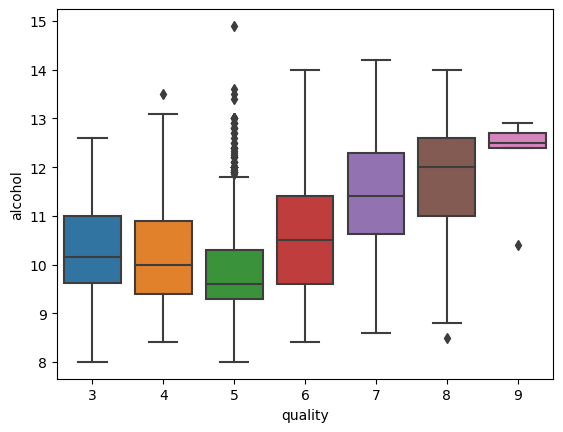

In [13]:
# Checking alcohol data distribution in terms of quality wine
sns.boxplot(data=df,x="quality",y="alcohol")

Findings: 
The above boxplot shows outliers in wine quality grade 5 which may impact on the avg alcohol contain compare to other grades.

Type
red      5.636023
white    5.877909
Name: quality, dtype: float64

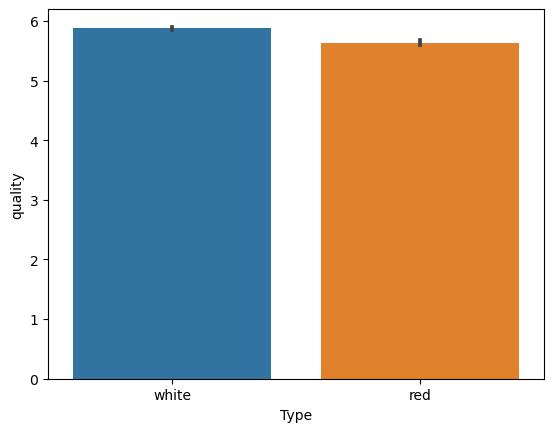

In [14]:
sns.barplot(x="Type",y="quality",data=df)
df.groupby("Type")['quality'].mean()

Finding: Avg quality of both white & red wines are in between 5.6 to 5.8. According to the data, quality of both type of wines are same.

In [15]:
# Hypothesis Testing
#H0:There is no difference in quality of white & red wines.
#Ha:There is a significance significant difference in quality of white & red wines.
# Significant level is 0.05
# Check p-value
from scipy import stats
white=df[df['Type']=="white"]
red=df[df['Type']=="red"]
sample_white=white.sample(n=20,random_state=200,replace=True)
sample_red=red.sample(n=20,random_state=100,replace=True)
t_statistic, p_value = stats.ttest_ind(a=sample_white['quality'], b=sample_red['quality'],equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.7646014547562577
p-value: 0.4493657199511807


Finding: Here p-value is greater than significant level.Hence we fail to reject the null hypothesis. 
There is no difference in quality of white & red wines based on alcohol.

In [16]:
# Use SMOTE for the imbalance class of data 
from imblearn.over_sampling import SMOTE
X = df.drop(['Type','quality'], axis=1)
y = df['quality']
sm = SMOTE(random_state=42, k_neighbors=4)
X_res, y_res = sm.fit_resample(X, y)

<Axes: >

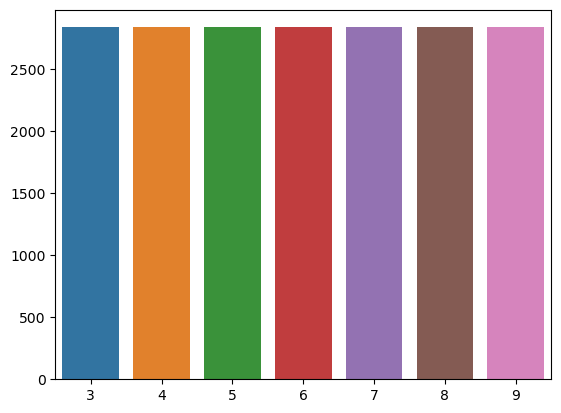

In [17]:
# Checking final result
idx,c=np.unique(y_res,return_counts=True)
sns.barplot(x=idx,y=c)

1. Here the outcome dependent variable is categorical. Hence we may consider logistic regression model.
2. We found a strong positive correlation between total sulfur dioxide and free sulfur dioxide hence to follow 'no multicollinearity' we will drop one variable. Free sulfur dioxide has higher value of r compare to total sulfur dioxide with outcome variable. Hence we will drop total sulfur dioxide.

In [18]:
X = df.drop(['Type','quality','total sulfur dioxide'], axis=1)
y = df['quality']

**Data Model**

In [19]:
# LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Build regression model
LR=LogisticRegression()
LR.fit(X_train,y_train)

# Save the prediction
y_LR_pred=LR.predict(X_test)
print(classification_report(y_test, y_LR_pred))

              precision    recall  f1-score   support

           3       0.25      0.40      0.31       576
           4       0.37      0.42      0.39       568
           5       0.24      0.20      0.22       569
           6       0.22      0.07      0.11       574
           7       0.15      0.02      0.03       561
           8       0.32      0.54      0.40       597
           9       0.36      0.47      0.41       526

    accuracy                           0.30      3971
   macro avg       0.27      0.30      0.27      3971
weighted avg       0.27      0.30      0.27      3971



C:\Users\sudip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

# Save the prediction
y_gnb_pred=gnb.predict(X_test)
print(classification_report(y_test, y_gnb_pred))

              precision    recall  f1-score   support

           3       0.65      0.38      0.48       576
           4       0.43      0.47      0.45       568
           5       0.31      0.37      0.34       569
           6       0.26      0.08      0.12       574
           7       0.24      0.15      0.19       561
           8       0.33      0.61      0.43       597
           9       0.70      0.94      0.80       526

    accuracy                           0.42      3971
   macro avg       0.42      0.43      0.40      3971
weighted avg       0.41      0.42      0.40      3971



In [21]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

# Save the prediction
y_dt_pred=dt.predict(X_test)
print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

           3       0.94      0.97      0.96       576
           4       0.84      0.87      0.85       568
           5       0.69      0.66      0.67       569
           6       0.60      0.55      0.57       574
           7       0.71      0.73      0.72       561
           8       0.89      0.89      0.89       597
           9       0.99      1.00      1.00       526

    accuracy                           0.81      3971
   macro avg       0.81      0.81      0.81      3971
weighted avg       0.81      0.81      0.81      3971



In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

# Save the prediction
y_rf_pred=dt.predict(X_test)
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           3       0.94      0.97      0.96       576
           4       0.84      0.87      0.85       568
           5       0.69      0.66      0.67       569
           6       0.60      0.55      0.57       574
           7       0.71      0.73      0.72       561
           8       0.89      0.89      0.89       597
           9       0.99      1.00      1.00       526

    accuracy                           0.81      3971
   macro avg       0.81      0.81      0.81      3971
weighted avg       0.81      0.81      0.81      3971



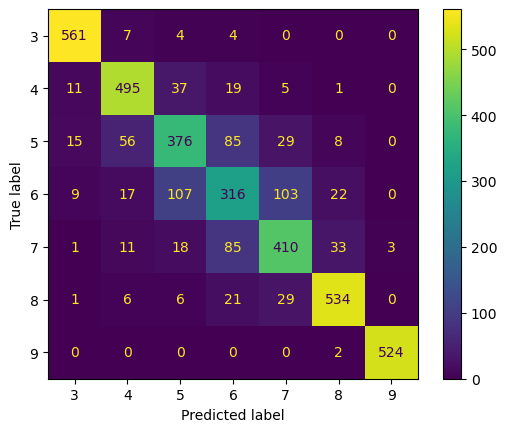

In [72]:
from sklearn.metrics import confusion_matrix

labels = [3,4,5,6,7,8,9]
cm = confusion_matrix(y_test, y_rf_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

Findings: 
1. The above mutliclass confusion matrix shows that how well the model is performing across multiple classes. The diagonal elements are the TP of the confusion matrix represent the number of instances where the true class and the predicted class are the same. These values indicate the number of correct classification for each wine quality.
2. The presence of high values in the True Positive (TP) diagonal elements across each class in the confusion matrix indicates the model's strong performance in classifying wine quality. This suggests that the model effectively identifies instances belonging to each quality class, demonstrating its capability to accurately predict the quality level for various types of wine.
3. The off-diagonal elements, including false positives (FP) and false negatives (FN), within the confusion matrix indicate misclassifications made by the model. Low values in these areas suggest that the model is performing well in classifying wine quality accurately.

Conclusion: Both models perform reasonably well with an accuracy of 81%. The precision, recall, and F1-score are consistent across different classes for both models. Given the similarity in performance metrics, it's difficult to determine which model is definitively better based solely on this information. However, in practice, Random Forest models tend to be more robust and less prone to overfitting compared to single Decision Trees, especially for complex datasets. Therefore, if computational resources allow, the Random Forest model might be preferred for its potential to generalize better to unseen data and handle more complex relationships in the data.